In [20]:
#dependencies
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [21]:
#data file

filepath="olympics_df.csv"

olympics_df=pd.read_csv(filepath)

olympics_df.head()

,ID,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City
0,107607,M,19.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Pommelled Horse,1896,Summer,Athina
1,122526,M,19.0,NaN,NaN,FRA,France,Silver,Athletics,Athletics Men's Triple Jump,1896,Summer,Athina
2,122526,M,19.0,NaN,NaN,FRA,France,NaN,Athletics,Athletics Men's Long Jump,1896,Summer,Athina
3,12563,M,25.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Horse Vault,1896,Summer,Athina
4,12563,M,25.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Parallel Bars,1896,Summer,Athina


In [22]:
#add 3 medal columns for Gold, Silver, and Bronze...

olympicsMedals=olympics_df
olympicsMedals["Gold"]=[1 if x=="Gold" else 0 for x in olympicsMedals.Medal]
olympicsMedals["Silver"]=[1 if x=="Silver" else 0 for x in olympicsMedals.Medal]
olympicsMedals["Bronze"]=[1 if x=="Bronze" else 0 for x in olympicsMedals.Medal]

#...and 1 extra medal column that can be counted later
olympicsMedals["MedalCount"]=[0 if pd.isnull(x) else 1 for x in olympics_df.Medal]

olympicsMedals.head()

,ID,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City,Gold,Silver,Bronze,MedalCount
0,107607,M,19.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Pommelled Horse,1896,Summer,Athina,0,0,0,0
1,122526,M,19.0,NaN,NaN,FRA,France,Silver,Athletics,Athletics Men's Triple Jump,1896,Summer,Athina,0,1,0,1
2,122526,M,19.0,NaN,NaN,FRA,France,NaN,Athletics,Athletics Men's Long Jump,1896,Summer,Athina,0,0,0,0
3,12563,M,25.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Horse Vault,1896,Summer,Athina,0,0,0,0
4,12563,M,25.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Parallel Bars,1896,Summer,Athina,0,0,0,0


In [23]:
#Groupby on countries, sum up the medals and put that in a new dataframe.

countrygroup=olympicsMedals[["NOC", "Region", "MedalCount", "Gold", "Silver", "Bronze"]].groupby(by=["NOC","Region"])

countryMedalTally=pd.DataFrame(countrygroup.sum().sort_values(by="MedalCount",ascending=False)).reset_index()

countryMedalTally.head()

,NOC,Region,MedalCount,Gold,Silver,Bronze
0,USA,United States of America,5637,2638,1641,1358
1,URS,Russia,2503,1082,732,689
2,GER,Germany,2165,745,674,746
3,GBR,United Kingdom,2068,678,739,651
4,FRA,France,1777,501,610,666


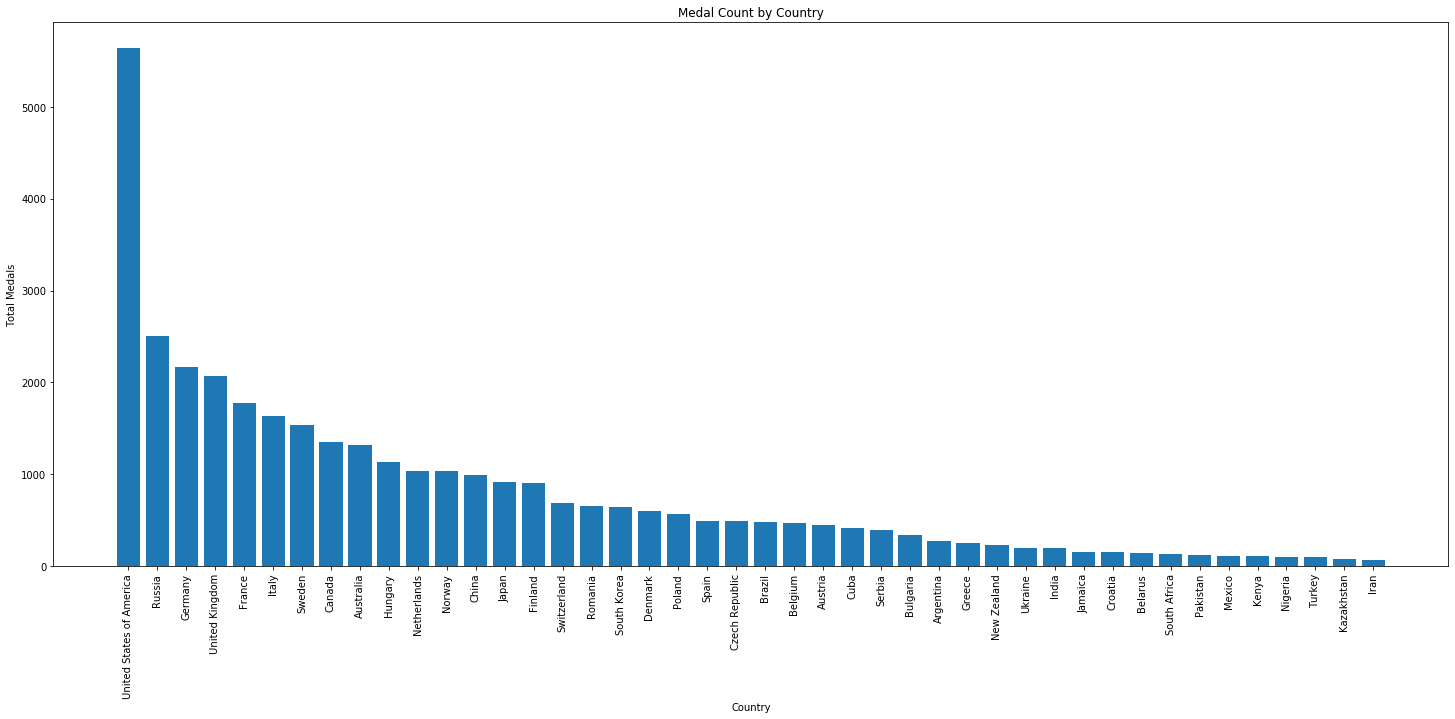

In [24]:
#plot of total medals tally

x_values=countryMedalTally.iloc[0:50,]["Region"]

y_values=countryMedalTally.iloc[0:50,]["MedalCount"]

plt.figure(figsize=(25,10))
plt.bar(x_values,y_values)
plt.title("Medal Count by Country")
plt.xlabel("Country")
plt.ylabel("Total Medals")
plt.xticks(rotation=90)

plt.show()

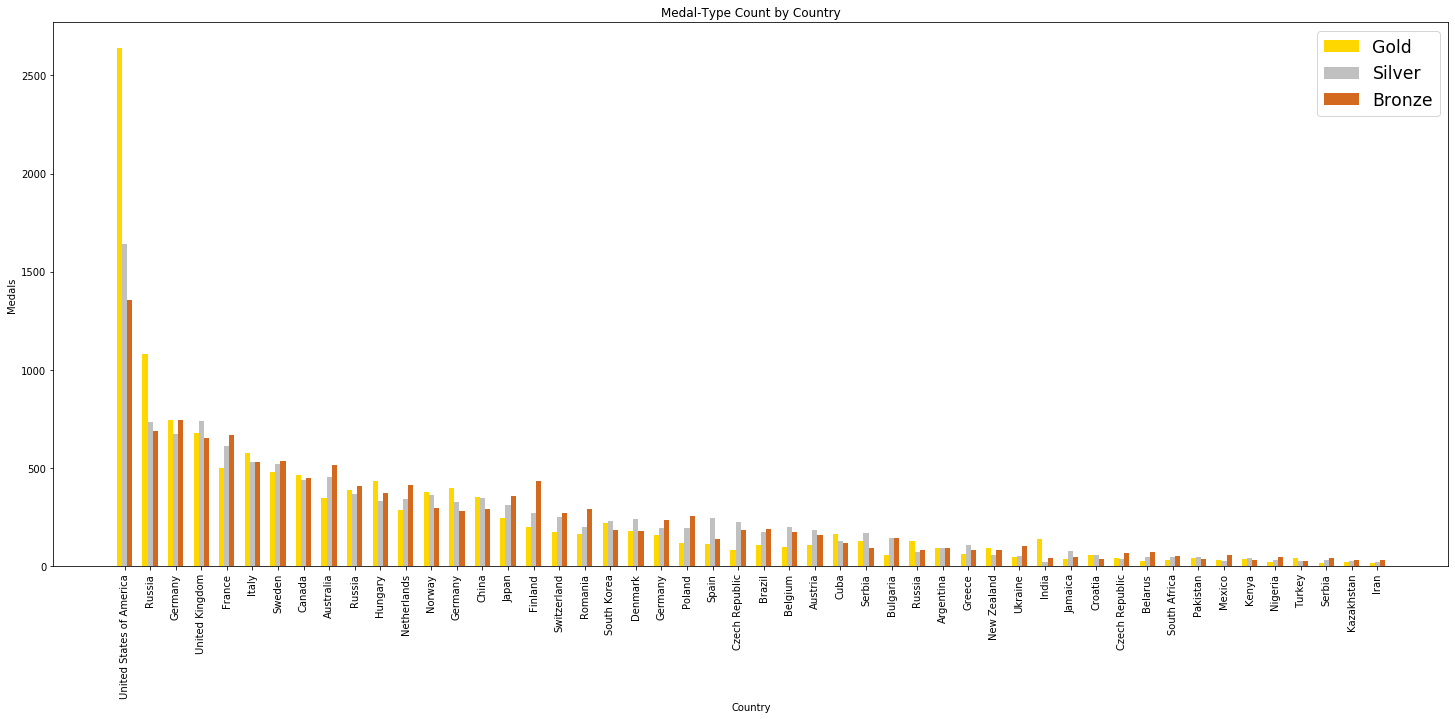

In [25]:
#plot of total medals tally

#define x-values as numbers from 0 to 49

labels=list(countryMedalTally.iloc[0:50,]["Region"])
x_values=np.arange(len(labels))

#define 3 y-values, 1 for each type of medal
y1_values=countryMedalTally.iloc[0:50,]["Gold"]
y2_values=countryMedalTally.iloc[0:50,]["Silver"]
y3_values=countryMedalTally.iloc[0:50,]["Bronze"]

#plot the 3 bars next to each other
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
golds=ax.bar(x_values-0.2,y1_values,color="gold",align="center",width=0.2,label="Gold")
silvers=ax.bar(x_values,y2_values,color="silver",align="center",width=0.2,label="Silver")
bronzes=ax.bar(x_values+0.2,y3_values,color="chocolate",align="center",width=0.2,label="Bronze")

#set overall labels for the X and Y axes
ax.set_ylabel("Medals")
ax.set_xlabel("Country")

#arrange xticks and give them country labels
ax.set_xticks(x_values)
ax.set_xticklabels(labels)

#add legend
ax.legend(fontsize="xx-large")

#for the overall figure, add a title, rotate the xticks
plt.title("Medal-Type Count by Country")
plt.xticks(rotation=90)

#show
plt.show()

In [39]:
#find center lats and lngs for every country

import googlemaps

countries=list(countryMedalTally["Region"])
center_lat=[None]*len(countries)
center_lng=[None]*len(countries)

from api_keys import gkey

gm = googlemaps.Client(key=gkey)

for i in range(len(countries)):
    try:
        geocode_result = gm.geocode(countries[i])[0]
        center_lat[i]=geocode_result['geometry']['location']['lat']
        center_lng[i]=geocode_result['geometry']['location']['lng']
        
        if center_lat==np.nan:
            center_lat=0
            center_lng=0
    except:
        continue
        

In [40]:
#create locations dataframe to go into heatmap layer

locations=pd.DataFrame({
    "Lat":center_lat,
    "Lng":center_lng
})

locations

,Lat,Lng
0,37.090240,-95.712891
1,61.524010,105.318756
2,51.165691,10.451526
3,55.378051,-3.435973
4,46.227638,2.213749
...,...,...
221,11.803749,-15.180413
222,-6.314993,143.955550
223,7.514980,134.582520
224,31.952162,35.233154


In [41]:
#configure gmaps

import gmaps

gmaps.configure(api_key=gkey)

#calculate medal weights
medalweights=list((3*countryMedalTally["Gold"])+(2*countryMedalTally["Silver"])+(countryMedalTally["Bronze"]))

#add heat layer
fig=gmaps.figure(zoom_level=2,center=(20,0))
heat_layer=gmaps.heatmap_layer(locations,weights=medalweights,dissipating=False,point_radius=5,max_intensity=6000)
fig.add_layer(heat_layer)

#display
display(fig)

Figure(layout=FigureLayout(height='420px'))